# Collaborative filtering example

In [1]:
from fastai.collab import *
from fastai.tabular import *

In [2]:
user, item, title = 'userId', 'movieId', 'title'

In [3]:
path = untar_data(URLs.ML_SAMPLE)

In [4]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/movie_lens_sample/ratings.csv')]

In [5]:
ratings = pd.read_csv(path/'ratings.csv')

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [10]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [3]:
y_range = [0,5.5]

In [12]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [13]:
learn.fit_one_cycle(cyc_len=3, max_lr=5e-3)

epoch,train_loss,valid_loss,time
1,1.603977,0.927326,00:00
2,0.853942,0.678330,00:00
3,0.648506,0.666878,00:00


# MovieLens 100k

In [17]:
! wget  http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2019-03-16 03:34:59--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.34.235
Connecting to files.grouplens.org (files.grouplens.org)|128.101.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  11.6MB/s    in 0.4s    

2019-03-16 03:35:00 (11.6 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [4]:
path = Config.data_path()/'ml-100k'

In [5]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None, 
                      names=[user, item, 'rating', 'timestamp'])

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
movies = pd.read_csv(path/'u.item', delimiter='|', encoding='latin-1', header=None,
                    names=[item, title, 'date', 'N', 'url', *(f'g{i}' for i in range(19))])

In [8]:
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
len(ratings), len(movies)

(100000, 1682)

In [10]:
rating_movie = ratings.merge(movies[[item, title]])

In [11]:
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [18]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=.1, item_name=title)

In [19]:
data.show_batch()

userId,title,target
315,Strictly Ballroom (1992),4.0
883,Seven (Se7en) (1995),2.0
637,"People vs. Larry Flynt, The (1996)",2.0
397,"Terminator, The (1984)",3.0
783,Deconstructing Harry (1997),4.0


In [20]:
y_range = [0, 5.5]

In [21]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


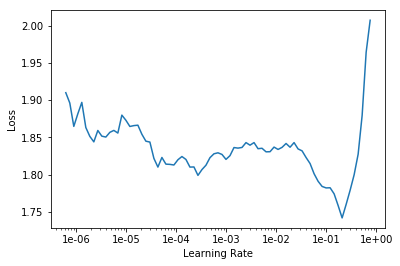

In [27]:
learn.recorder.plot(skip_end=13)

In [29]:
lr = 4e-3

In [31]:
learn.fit_one_cycle(cyc_len=5, max_lr=lr)

epoch,train_loss,valid_loss,time
1,0.946590,0.956175,00:05
2,0.862074,0.883714,00:05
3,0.778203,0.841262,00:05
4,0.667866,0.817909,00:05
5,0.601270,0.816477,00:05


In [32]:
learn.save('dotprod')

In [33]:
learn.load('dotprod');

In [34]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [45]:
top_movies = rating_movie.groupby('title')['rating'].count().sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

In [46]:
top_movies

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', ...,
       'In the Bleak Midwinter (1995)', 'Party Girl (1995)', 'Highlander III: The Sorcerer (1994)',
       'Bastard Out of Carolina (1996)'], dtype=object)

In [49]:
movie_bias = learn.bias(top_movies, is_item=True)

In [52]:
movie_bias.shape

torch.Size([1000])

In [70]:
title

'Á köldum klaka (Cold Fever) (1994)'

In [71]:
mean_ratings = rating_movie.groupby('title')['rating'].mean()

In [74]:
movie_ratings = [(b, n, mean_ratings.loc[n]) for n, b in zip(top_movies, movie_bias)]

In [75]:
sorted(movie_ratings, key=lambda x: x[0])[:15]

[(tensor(-0.3235),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.2781),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2552), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2484), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2302), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2275), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2237), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2192), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.1968), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.1965), 'Beverly Hills Ninja (1997)', 2.3125),
 (tensor(-0.1961), 'Booty Call (1997)', 2.1666666666666665),
 (tensor(-0.1939), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.1925), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.1867), 'Grease 2 (1982)', 2.0),
 (tensor(-0.1865), "McHale's Navy (1997)", 2

In [76]:
sorted(movie_ratings, key=lambda x: x[0], reverse=True)[:15]

[(tensor(0.5500), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5377), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.4784), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.4782), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.4780), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.4693), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4582), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.4582), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.4466), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4439), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4347), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4330), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4251), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.4212), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4173), 'Godfather, The (1972)', 4.283292978208232)]

In [77]:
movie_w = learn.weight(top_movies, is_item=True)

In [78]:
movie_w.shape

torch.Size([1000, 40])

In [79]:
movie_pca = movie_w.pca(3)

In [81]:
movie_pca.shape

torch.Size([1000, 3])

In [86]:
fac0, fac1, fac2 = movie_pca.t()

In [87]:
movie_comp = [(v, n) for v, n in zip(fac0, top_movies)]

In [88]:
sorted(movie_comp, key=lambda x: x[0])[:10]

[(tensor(-1.2856), "McHale's Navy (1997)"),
 (tensor(-1.2666), 'Home Alone 3 (1997)'),
 (tensor(-1.2404), 'Children of the Corn: The Gathering (1996)'),
 (tensor(-1.1759), 'Leave It to Beaver (1997)'),
 (tensor(-1.1755), 'Jungle2Jungle (1997)'),
 (tensor(-1.1703), 'Free Willy 3: The Rescue (1997)'),
 (tensor(-1.1365), 'Bio-Dome (1996)'),
 (tensor(-1.1256), 'Grease 2 (1982)'),
 (tensor(-1.1114), 'Congo (1995)'),
 (tensor(-1.1035), 'Batman & Robin (1997)')]

In [89]:
sorted(movie_comp, key=lambda x: x[0], reverse=True)[:10]

[(tensor(1.1075), 'Casablanca (1942)'),
 (tensor(1.0779), 'Wrong Trousers, The (1993)'),
 (tensor(1.0664), 'Close Shave, A (1995)'),
 (tensor(1.0601), 'Lawrence of Arabia (1962)'),
 (tensor(1.0107), 'Chinatown (1974)'),
 (tensor(0.9985), 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (tensor(0.9788), 'Godfather, The (1972)'),
 (tensor(0.9667), 'Some Folks Call It a Sling Blade (1993)'),
 (tensor(0.9663),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(0.9562), 'Third Man, The (1949)')]

In [91]:
movie_comp = [(v, n) for v, n in zip(fac1, top_movies)]

In [92]:
sorted(movie_comp, key=lambda x: x[0])[:10]

[(tensor(-0.8577), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-0.8435), 'Trainspotting (1996)'),
 (tensor(-0.7809), 'Clockwork Orange, A (1971)'),
 (tensor(-0.7477), 'Jude (1996)'),
 (tensor(-0.7422), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(-0.7416), 'Keys to Tulsa (1997)'),
 (tensor(-0.7412), 'Cable Guy, The (1996)'),
 (tensor(-0.7222), 'Exotica (1994)'),
 (tensor(-0.7126), 'Big Night (1996)'),
 (tensor(-0.6928), 'Very Brady Sequel, A (1996)')]

In [93]:
sorted(movie_comp, key=lambda x: x[0], reverse=True)[:10]

[(tensor(1.1088), 'Braveheart (1995)'),
 (tensor(1.0471), 'Raiders of the Lost Ark (1981)'),
 (tensor(0.9285), 'Titanic (1997)'),
 (tensor(0.9207), 'Independence Day (ID4) (1996)'),
 (tensor(0.8870), "It's a Wonderful Life (1946)"),
 (tensor(0.8633), 'Sleepless in Seattle (1993)'),
 (tensor(0.8618), 'Star Wars (1977)'),
 (tensor(0.8469), 'Hunt for Red October, The (1990)'),
 (tensor(0.8349), 'Indiana Jones and the Last Crusade (1989)'),
 (tensor(0.8348), 'Pretty Woman (1990)')]

In [94]:
movie_comp = [(v, n) for v, n in zip(fac2, top_movies)]

In [95]:
sorted(movie_comp, key=lambda x: x[0])[:10]

[(tensor(-0.6467), 'Dirty Dancing (1987)'),
 (tensor(-0.6193), 'To Kill a Mockingbird (1962)'),
 (tensor(-0.6162), 'Crucible, The (1996)'),
 (tensor(-0.6048), 'Old Yeller (1957)'),
 (tensor(-0.5701), 'Bridges of Madison County, The (1995)'),
 (tensor(-0.5700), 'Little Women (1994)'),
 (tensor(-0.5542), 'Everyone Says I Love You (1996)'),
 (tensor(-0.5271), 'Room with a View, A (1986)'),
 (tensor(-0.5230), 'Piano, The (1993)'),
 (tensor(-0.5228), 'On Golden Pond (1981)')]

In [96]:
sorted(movie_comp, key=lambda x: [0], reverse=True)[:10]

[(tensor(0.8009), 'Star Wars (1977)'),
 (tensor(0.0882), 'Contact (1997)'),
 (tensor(0.1477), 'Fargo (1996)'),
 (tensor(0.5901), 'Return of the Jedi (1983)'),
 (tensor(0.2716), 'Liar Liar (1997)'),
 (tensor(-0.4630), 'English Patient, The (1996)'),
 (tensor(0.7029), 'Scream (1996)'),
 (tensor(0.1572), 'Toy Story (1995)'),
 (tensor(0.1076), 'Air Force One (1997)'),
 (tensor(0.3234), 'Independence Day (ID4) (1996)')]

In [103]:
np.random.rand(3)

array([0.185347, 0.361743, 0.788747])

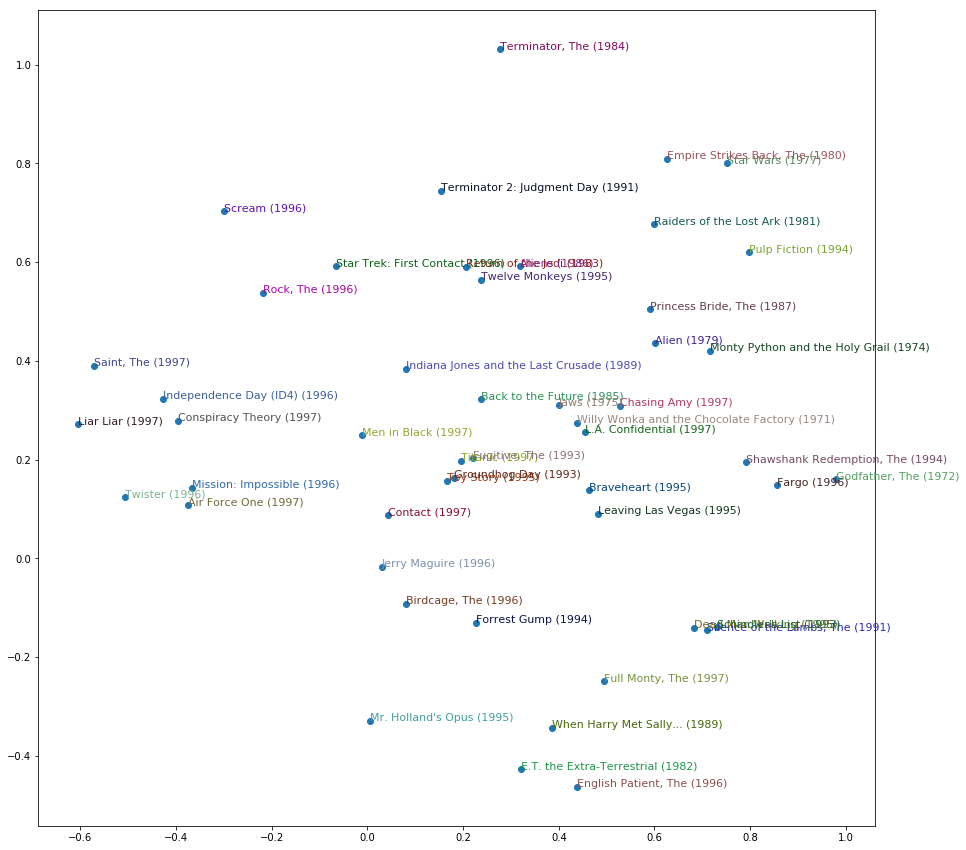

In [106]:
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(X, Y)
for x, y, s in zip(X, Y, top_movies[idxs]):
    ax.text(x=x, y=y, s=s, fontsize=11, color=.7*np.random.rand(3))